<a href="https://colab.research.google.com/github/michealman114/GAN-Experiments/blob/main/Convolutional_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original code for importing CIFAR-10 from https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

Modified to only use dogs and cats

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [ ]:
train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = transforms.ToTensor(), 
    download = True,            
)

In [133]:
# train GAN to generate dogs, trained over dogs and cats

# cat has label of 3, dog has label of 5

class CustomDataset(Dataset): # dataset for containing elements of only one class
  def __init__(self, images):
    self.images = images
  def __len__(self):
    return len(self.images)
  def __getitem__(self, i):
    return self.images[i]
"""
dog_list = []
cat_list = []
for data, label in trainset:
  if label == 3:
    cat_list.append(data)
  elif label == 5:
    dog_list.append(data)
  else:
    pass

dog_dataset = CustomDataset(dog_list)
cat_dataset = CustomDataset(cat_list)

#batch_size of 4 declared in previous code cell
dogloader = DataLoader(dog_dataset, batch_size = batch_size, shuffle= True, num_workers=2)
catloader = DataLoader(cat_dataset, batch_size = batch_size, shuffle= True, num_workers=2)
"""
batch_size = 8

num_list = []
for data, label in train_data:
  if label == 8:
    num_list.append(data)

num_data = CustomDataset(num_list)

numloader = DataLoader(num_data, batch_size = batch_size, shuffle= True, num_workers=2)

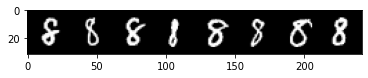

In [135]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
#dataiter = iter(trainloader)
#images, labels = dataiter.next()
data_iter = iter(numloader)
batch = data_iter.next()
#print(batch.shape)
#print(batch[0])
#print(labels)

# show images
#imshow(torchvision.utils.make_grid(images))
imshow(torchvision.utils.make_grid(batch))
# print labels
#print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [142]:
"""
takes input of 1 * 112 * 112 gaussian noise

produces 1 * 28 * 28
"""
import torch.nn as nn

class Generator(nn.Module):
  def __init__(self):
    super(Generator, self).__init__()
    self.net = nn.Sequential(
        nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = 5, stride = 1, padding = 2),
        nn.LeakyReLU(negative_slope=0.2),
        #nn.Dropout2d(p=0.2),
        nn.MaxPool2d(kernel_size = 2),
        nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 5, stride = 1, padding = 2),
        nn.Dropout2d(p=0.2),
        nn.LeakyReLU(negative_slope=0.2),
        nn.Conv2d(in_channels= 16, out_channels = 8, kernel_size = 5, stride = 1, padding = 2),
        #nn.MaxPool2d(kernel_size = 2),
        #nn.Dropout2d(),
        nn.LeakyReLU(negative_slope=0.2),
        nn.Conv2d(in_channels= 8, out_channels = 1, kernel_size = 5, stride = 1, padding = 2),
        nn.Sigmoid()
    )
    self.dense = nn.Linear(1*56*56, 1*56*56)
    self.relu = nn.ReLU()
  def forward(self, input):
    x = self.relu(self.dense(input))
    x = x.view(x.size(0),1,56,56)
    return self.net(x)

In [130]:
"""
takes input of 1 * 28 * 28 tensor representing an image

gives it a score based on how "dog-like" an image is
"""
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()
    self.net = nn.Sequential(
      nn.Conv2d(in_channels=1, out_channels = 16, kernel_size = 5, stride = 1, padding = 2),
      nn.Dropout2d(p=0.2),
      nn.LeakyReLU(negative_slope=0.2),
      nn.MaxPool2d(kernel_size = 2),
      nn.Conv2d(16,32,5,1,2),
      #nn.Dropout(p=0.4),
      nn.LeakyReLU(negative_slope=0.2),
      nn.MaxPool2d(kernel_size = 2)
    )
    self.linear = nn.Linear(in_features = 32* 7 * 7, out_features = 1)
    self.activation = nn.ReLU()
  def forward(self, input):
    x = self.net(input)
    x = self.linear(torch.flatten(x, start_dim = 1))
    return self.activation(x)

In [ ]:
# https://discuss.pytorch.org/t/set-constraints-on-parameters-or-layers/23620/2
class WeightClipper(object):
    def __init__(self, c, frequency=5):
        self.frequency = frequency
        self.c = abs(c)

    def __call__(self, module):
        # filter the variables to get the ones you want
        if hasattr(module, 'weight'):
            w = module.weight.data
            w = w.clamp(-self.c,self.c)
            module.weight.data = w

discriminator trained 3 times for epoch 1/50
generator on iteration 0 of epoch 1/50
generator on iteration 100 of epoch 1/50
generator on iteration 200 of epoch 1/50
generator on iteration 300 of epoch 1/50
generator on iteration 400 of epoch 1/50
generator on iteration 500 of epoch 1/50
generator on iteration 600 of epoch 1/50
generator on iteration 700 of epoch 1/50


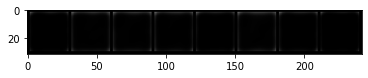

discriminator trained 3 times for epoch 2/50
generator on iteration 0 of epoch 2/50
generator on iteration 100 of epoch 2/50
generator on iteration 200 of epoch 2/50
generator on iteration 300 of epoch 2/50
generator on iteration 400 of epoch 2/50
generator on iteration 500 of epoch 2/50
generator on iteration 600 of epoch 2/50
generator on iteration 700 of epoch 2/50


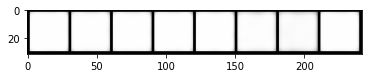

discriminator trained 3 times for epoch 3/50
generator on iteration 0 of epoch 3/50
generator on iteration 100 of epoch 3/50
generator on iteration 200 of epoch 3/50
generator on iteration 300 of epoch 3/50
generator on iteration 400 of epoch 3/50
generator on iteration 500 of epoch 3/50
generator on iteration 600 of epoch 3/50
generator on iteration 700 of epoch 3/50


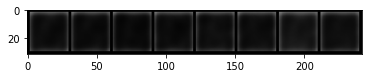

discriminator trained 3 times for epoch 4/50
generator on iteration 0 of epoch 4/50
generator on iteration 100 of epoch 4/50
generator on iteration 200 of epoch 4/50
generator on iteration 300 of epoch 4/50
generator on iteration 400 of epoch 4/50
generator on iteration 500 of epoch 4/50
generator on iteration 600 of epoch 4/50
generator on iteration 700 of epoch 4/50


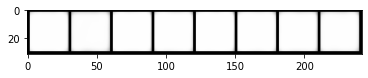

discriminator trained 3 times for epoch 5/50
generator on iteration 0 of epoch 5/50
generator on iteration 100 of epoch 5/50
generator on iteration 200 of epoch 5/50
generator on iteration 300 of epoch 5/50
generator on iteration 400 of epoch 5/50
generator on iteration 500 of epoch 5/50
generator on iteration 600 of epoch 5/50
generator on iteration 700 of epoch 5/50


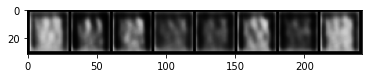

discriminator trained 3 times for epoch 6/50
generator on iteration 0 of epoch 6/50
generator on iteration 100 of epoch 6/50
generator on iteration 200 of epoch 6/50
generator on iteration 300 of epoch 6/50
generator on iteration 400 of epoch 6/50
generator on iteration 500 of epoch 6/50
generator on iteration 600 of epoch 6/50
generator on iteration 700 of epoch 6/50


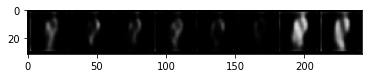

discriminator trained 3 times for epoch 7/50
generator on iteration 0 of epoch 7/50
generator on iteration 100 of epoch 7/50
generator on iteration 200 of epoch 7/50
generator on iteration 300 of epoch 7/50
generator on iteration 400 of epoch 7/50
generator on iteration 500 of epoch 7/50
generator on iteration 600 of epoch 7/50
generator on iteration 700 of epoch 7/50


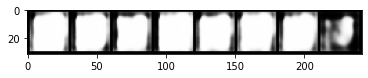

discriminator trained 3 times for epoch 8/50
generator on iteration 0 of epoch 8/50
generator on iteration 100 of epoch 8/50
generator on iteration 200 of epoch 8/50
generator on iteration 300 of epoch 8/50
generator on iteration 400 of epoch 8/50
generator on iteration 500 of epoch 8/50
generator on iteration 600 of epoch 8/50
generator on iteration 700 of epoch 8/50


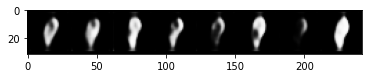

discriminator trained 3 times for epoch 9/50
generator on iteration 0 of epoch 9/50
generator on iteration 100 of epoch 9/50
generator on iteration 200 of epoch 9/50
generator on iteration 300 of epoch 9/50
generator on iteration 400 of epoch 9/50
generator on iteration 500 of epoch 9/50
generator on iteration 600 of epoch 9/50
generator on iteration 700 of epoch 9/50


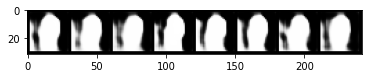

discriminator trained 3 times for epoch 10/50
generator on iteration 0 of epoch 10/50
generator on iteration 100 of epoch 10/50
generator on iteration 200 of epoch 10/50
generator on iteration 300 of epoch 10/50
generator on iteration 400 of epoch 10/50
generator on iteration 500 of epoch 10/50
generator on iteration 600 of epoch 10/50
generator on iteration 700 of epoch 10/50


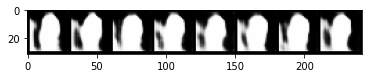

discriminator trained 3 times for epoch 11/50
generator on iteration 0 of epoch 11/50
generator on iteration 100 of epoch 11/50
generator on iteration 200 of epoch 11/50
generator on iteration 300 of epoch 11/50
generator on iteration 400 of epoch 11/50
generator on iteration 500 of epoch 11/50
generator on iteration 600 of epoch 11/50
generator on iteration 700 of epoch 11/50


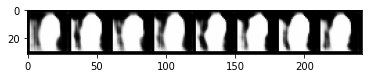

discriminator trained 3 times for epoch 12/50
generator on iteration 0 of epoch 12/50
generator on iteration 100 of epoch 12/50
generator on iteration 200 of epoch 12/50
generator on iteration 300 of epoch 12/50
generator on iteration 400 of epoch 12/50
generator on iteration 500 of epoch 12/50
generator on iteration 600 of epoch 12/50
generator on iteration 700 of epoch 12/50


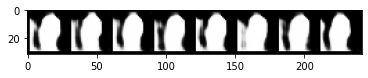

discriminator trained 3 times for epoch 13/50
generator on iteration 0 of epoch 13/50
generator on iteration 100 of epoch 13/50
generator on iteration 200 of epoch 13/50
generator on iteration 300 of epoch 13/50
generator on iteration 400 of epoch 13/50
generator on iteration 500 of epoch 13/50
generator on iteration 600 of epoch 13/50
generator on iteration 700 of epoch 13/50


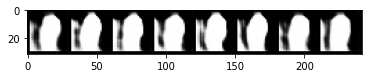

discriminator trained 3 times for epoch 14/50
generator on iteration 0 of epoch 14/50
generator on iteration 100 of epoch 14/50
generator on iteration 200 of epoch 14/50
generator on iteration 300 of epoch 14/50
generator on iteration 400 of epoch 14/50
generator on iteration 500 of epoch 14/50
generator on iteration 600 of epoch 14/50
generator on iteration 700 of epoch 14/50


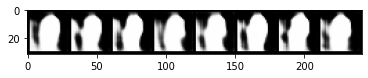

discriminator trained 3 times for epoch 15/50
generator on iteration 0 of epoch 15/50
generator on iteration 100 of epoch 15/50
generator on iteration 200 of epoch 15/50
generator on iteration 300 of epoch 15/50
generator on iteration 400 of epoch 15/50
generator on iteration 500 of epoch 15/50
generator on iteration 600 of epoch 15/50
generator on iteration 700 of epoch 15/50


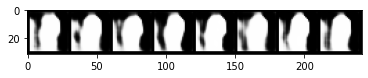

discriminator trained 3 times for epoch 16/50
generator on iteration 0 of epoch 16/50
generator on iteration 100 of epoch 16/50
generator on iteration 200 of epoch 16/50
generator on iteration 300 of epoch 16/50
generator on iteration 400 of epoch 16/50
generator on iteration 500 of epoch 16/50
generator on iteration 600 of epoch 16/50
generator on iteration 700 of epoch 16/50


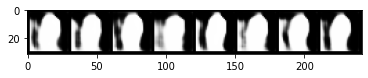

discriminator trained 3 times for epoch 17/50
generator on iteration 0 of epoch 17/50
generator on iteration 100 of epoch 17/50
generator on iteration 200 of epoch 17/50
generator on iteration 300 of epoch 17/50
generator on iteration 400 of epoch 17/50
generator on iteration 500 of epoch 17/50
generator on iteration 600 of epoch 17/50
generator on iteration 700 of epoch 17/50


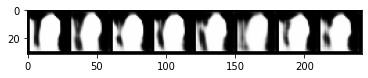

discriminator trained 3 times for epoch 18/50
generator on iteration 0 of epoch 18/50
generator on iteration 100 of epoch 18/50
generator on iteration 200 of epoch 18/50
generator on iteration 300 of epoch 18/50
generator on iteration 400 of epoch 18/50
generator on iteration 500 of epoch 18/50
generator on iteration 600 of epoch 18/50
generator on iteration 700 of epoch 18/50


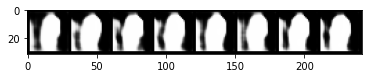

discriminator trained 3 times for epoch 19/50
generator on iteration 0 of epoch 19/50
generator on iteration 100 of epoch 19/50
generator on iteration 200 of epoch 19/50
generator on iteration 300 of epoch 19/50
generator on iteration 400 of epoch 19/50
generator on iteration 500 of epoch 19/50
generator on iteration 600 of epoch 19/50
generator on iteration 700 of epoch 19/50


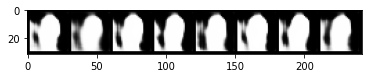

discriminator trained 3 times for epoch 20/50
generator on iteration 0 of epoch 20/50
generator on iteration 100 of epoch 20/50
generator on iteration 200 of epoch 20/50
generator on iteration 300 of epoch 20/50
generator on iteration 400 of epoch 20/50
generator on iteration 500 of epoch 20/50
generator on iteration 600 of epoch 20/50
generator on iteration 700 of epoch 20/50


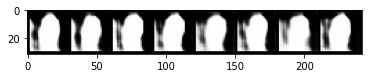

discriminator trained 3 times for epoch 21/50
generator on iteration 0 of epoch 21/50
generator on iteration 100 of epoch 21/50
generator on iteration 200 of epoch 21/50
generator on iteration 300 of epoch 21/50
generator on iteration 400 of epoch 21/50
generator on iteration 500 of epoch 21/50
generator on iteration 600 of epoch 21/50
generator on iteration 700 of epoch 21/50


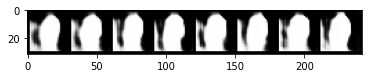

discriminator trained 3 times for epoch 22/50
generator on iteration 0 of epoch 22/50
generator on iteration 100 of epoch 22/50
generator on iteration 200 of epoch 22/50
generator on iteration 300 of epoch 22/50
generator on iteration 400 of epoch 22/50
generator on iteration 500 of epoch 22/50
generator on iteration 600 of epoch 22/50
generator on iteration 700 of epoch 22/50


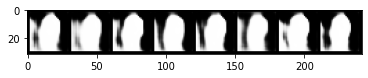

discriminator trained 3 times for epoch 23/50
generator on iteration 0 of epoch 23/50
generator on iteration 100 of epoch 23/50
generator on iteration 200 of epoch 23/50
generator on iteration 300 of epoch 23/50
generator on iteration 400 of epoch 23/50
generator on iteration 500 of epoch 23/50
generator on iteration 600 of epoch 23/50
generator on iteration 700 of epoch 23/50


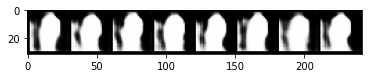

discriminator trained 3 times for epoch 24/50
generator on iteration 0 of epoch 24/50
generator on iteration 100 of epoch 24/50
generator on iteration 200 of epoch 24/50
generator on iteration 300 of epoch 24/50
generator on iteration 400 of epoch 24/50
generator on iteration 500 of epoch 24/50
generator on iteration 600 of epoch 24/50
generator on iteration 700 of epoch 24/50


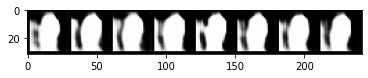

discriminator trained 3 times for epoch 25/50
generator on iteration 0 of epoch 25/50
generator on iteration 100 of epoch 25/50
generator on iteration 200 of epoch 25/50


In [ ]:
from torch import optim

g = Generator()
d = Discriminator()

alpha = 0.00005 # learning rate
c = 0.1 # clamp discriminator weights
#n_critic = 5 # number of iterations of training for discriminator

clipper = WeightClipper(c)

def train(num_epochs = 50, n_critic = 3):
  g_optim = optim.RMSprop(g.parameters(), lr = alpha)
  d_optim = optim.RMSprop(d.parameters(), lr = alpha)
  for i in range(num_epochs):
    for j in range(n_critic):
      for real in numloader:
        d_optim.zero_grad()
        noise = torch.rand((8,1*56*56))
        fake = g.forward(noise)
        fake_loss = d.forward(fake.detach())
        real_loss = d.forward(real)
        d_loss = torch.mean(fake_loss, dim = 0) - torch.mean(real_loss, dim = 0)
        d_loss.backward()
        d_optim.step()
        d.apply(clipper)
    print(f"discriminator trained {n_critic} times for epoch {i + 1}/{num_epochs}")
    for idx,real in enumerate(numloader):
      g_optim.zero_grad()
      noise = torch.randn((8,1*56*56))
      fake = g.forward(noise)
      g_loss = -torch.mean(d.forward(fake), dim = 0)
      g_loss.backward()
      g_optim.step()
      if idx%100 == 0:
        print(f"generator on iteration {idx} of epoch {i+1}/{num_epochs}")
    
    noise = torch.rand((8,1*56*56))
    fakes = g.forward(noise)
    imshow(torchvision.utils.make_grid(fakes))
train()

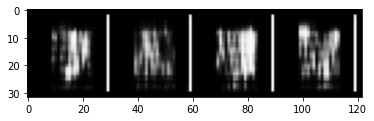

In [128]:
noise = torch.rand((4,1,56,56))
fakes = g.forward(noise)
imshow(torchvision.utils.make_grid(fakes))